## ***IMPORTING NECESSARY LIBRARIES***


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding , Dense , Dropout, LSTM
from tensorflow.keras.models import Sequential


## ***IMPORTING THE TRAIN AND TEST DATASET***

In [4]:
col_names = ['Text', 'Label']
train_data = pd.read_csv('Train.csv', names=col_names)
test_data = pd.read_csv('Test.csv', names=col_names)

In [5]:
# Checking the shape of the train and test datasets
train_data.shape, test_data.shape

((40001, 2), (5001, 2))

In [6]:
train_data.iloc[1].Text

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [7]:
#Extractinng train data into lists
train_text = train_data.Text.tolist()
train_text.pop(0)
train_label = train_data.Label.tolist()
train_label.pop(0)

#Extracting test data into lists 
test_text = test_data.Text.tolist()
test_text.pop(0)
test_label = test_data.Label.tolist()
test_label.pop(0)

# print(train_text[1:4])
# print(train_label[1:4])

'label'

In [8]:
#converting the labels into integers
for i in range(len(train_label)):
    train_label[i] = int(train_label[i])
    
for i in range(len(test_label)):
    test_label[i] = int(test_label[i])
 
#printing some of the data      
print(train_text[:5])
print(train_label[:5])

print(test_text[:5])
print(test_label[:5])

#converting the labels into arrays
train_label = np.array(train_label)
test_label = np.array(test_label)

['I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.', "When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping t

In [9]:
# Checking the length of each review i.e. no. of words per review
text_split_train = [text.split() for text in train_text]
text_length_train = [len(words) for words in text_split_train]



In [10]:
# Checking for maximum length of a review in the Train dataset
# print(text_length_train)
print(max(text_length_train))

2470


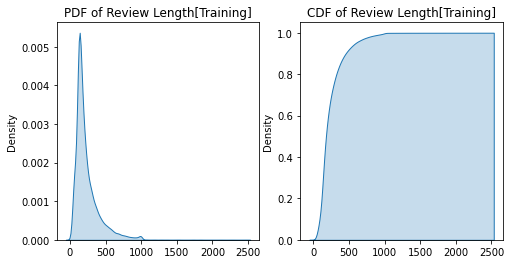

In [11]:
# Visualizing Distribution of length of reviews 
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(text_length_train, shade=True, ax=ax1)
plt.xlabel('')
plt.title("PDF of Review Length[Training]")

ax2 = plt.subplot(122)
sns.kdeplot(text_length_train, shade=True, cumulative=True,ax=ax2)
plt.xlabel('')
plt.title('CDF of Review Length[Training]')

plt.show()

In [12]:
top_words = 20000              
embedding_vec_length = 32
max_length = 600
trunc_type = 'post'
oov_tok = '<OOV>'


In [13]:
tokenizer = Tokenizer(num_words=top_words, oov_token=oov_tok)
tokenizer.fit_on_texts(train_text)

sequences = tokenizer.texts_to_sequences(train_text)

train_padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [14]:
train_padded.shape, test_padded.shape

((40000, 600), (5000, 600))

## ***MODEL BUILDING***

In [15]:
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vec_length, input_length= max_length, mask_zero=True))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           640000    
                                                                 
 dropout (Dropout)           (None, 600, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 693,301
Trainable params: 693,301
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
epochs = 5
history = model.fit(train_padded , train_label , epochs=epochs , validation_data=(test_padded , test_label), batch_size=64)

Epoch 1/5
625/625 [==============================] - 1054s 2s/step - loss: 0.4337 - accuracy: 0.7951 - val_loss: 0.2955 - val_accuracy: 0.8832
Epoch 2/5
625/625 [==============================] - 935s 1s/step - loss: 0.2785 - accuracy: 0.8903 - val_loss: 0.2759 - val_accuracy: 0.8936
Epoch 3/5
625/625 [==============================] - 922s 1s/step - loss: 0.2017 - accuracy: 0.9262 - val_loss: 0.2827 - val_accuracy: 0.8844
Epoch 4/5
625/625 [==============================] - 969s 2s/step - loss: 0.1644 - accuracy: 0.9400 - val_loss: 0.2844 - val_accuracy: 0.8898
Epoch 5/5
625/625 [==============================] - 849s 1s/step - loss: 0.1583 - accuracy: 0.9442 - val_loss: 0.3011 - val_accuracy: 0.8898


## ***VISUALIZING TRAIN AND VALIDATION CURVES***

In [17]:
def Learning_curve(history, epochs):
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

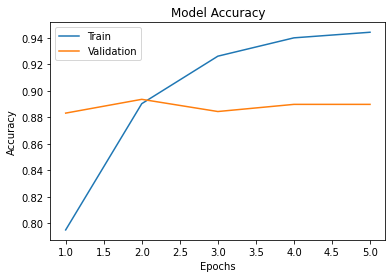

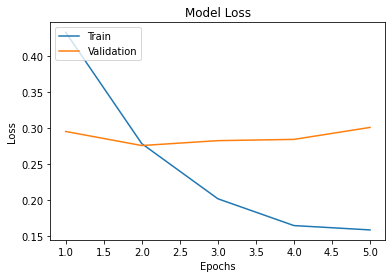

In [18]:
Learning_curve(history, 5)

In [19]:
tensorflow.keras.models.save_model(model, 'text_model.hdf5')